# 🎆 Convolutions

In this notebook, we'll walk through how convolutional filters can pick out different aspects of an image

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F

from skimage import data
from skimage.color import rgb2gray
from skimage.transform import resize

## 0. 原始输入图像

(64, 64)


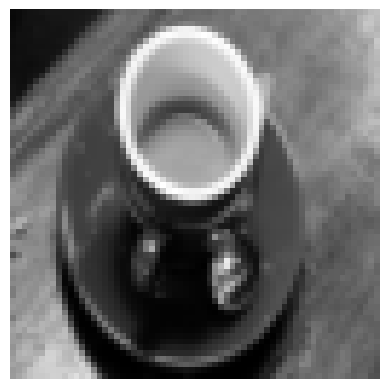

In [3]:
# %%
im = rgb2gray(data.coffee())
im = resize(im, (64, 64))
print(im.shape)

plt.axis("off")
plt.imshow(im, cmap="gray")

## 转成 PyTorch Tensor

In [4]:
# %%
# (H, W) -> (1, 1, H, W)
im_torch = torch.tensor(im, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

## 水平边缘检测（Horizontal Edge）

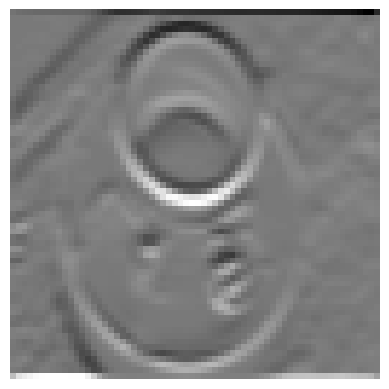

In [5]:
# %%
filter_h = torch.tensor(
    [[1, 1, 1],
     [0, 0, 0],
     [-1, -1, -1]],
    dtype=torch.float32
).unsqueeze(0).unsqueeze(0)

out_h = F.conv2d(im_torch, filter_h, padding=1)

plt.axis("off")
plt.imshow(out_h.squeeze().numpy(), cmap="gray")

## 垂直边缘检测（Vertical Edge）

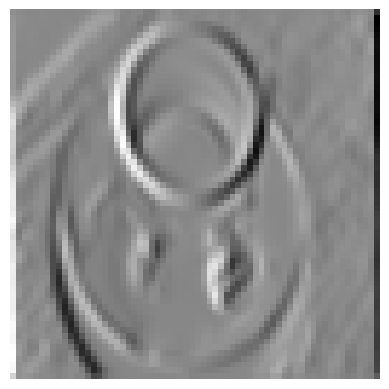

In [6]:
# %%
filter_v = torch.tensor(
    [[-1, 0, 1],
     [-1, 0, 1],
     [-1, 0, 1]],
    dtype=torch.float32
).unsqueeze(0).unsqueeze(0)

out_v = F.conv2d(im_torch, filter_v, padding=1)

plt.axis("off")
plt.imshow(out_v.squeeze().numpy(), cmap="gray")

## 水平边缘 + Stride = 2

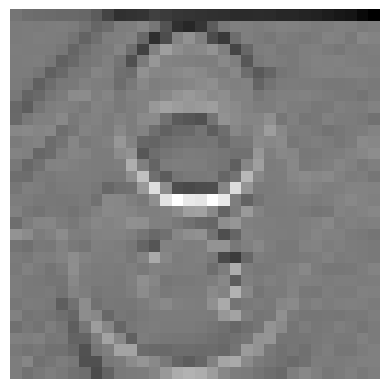

In [7]:
# %%
out_h_s2 = F.conv2d(im_torch, filter_h, padding=1, stride=2)

plt.axis("off")
plt.imshow(out_h_s2.squeeze().numpy(), cmap="gray")

## 垂直边缘 + Stride = 2

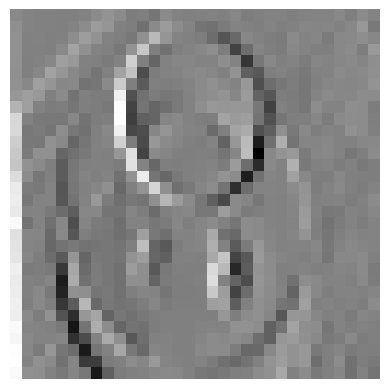

In [8]:
# %%
out_v_s2 = F.conv2d(im_torch, filter_v, padding=1, stride=2)

plt.axis("off")
plt.imshow(out_v_s2.squeeze().numpy(), cmap="gray")